## Задача №1: Подгонка кривой температурных данных

Экстремумы температуры на Аляске для каждого месяца, начиная с января, определяются следующим образом (в градусах Цельсия):

| max: | 17  | 19  | 21  | 28  | 33  | 38  | 37 | 37  | 31  | 23  | 19  | 18  |
|------|-----|-----|-----|-----|-----|-----|----|-----|-----|-----|-----|-----|
| min: | -62 | -59 | -56 | -46 | -32 | -18 | -9 | -13 | -25 | -46 | -52 | -58 |

1. Постройте график этих температурных экстремумов.

2. Определите функцию, которая может описывать минимальные и максимальные температуры. **Подсказка:** эта функция должна иметь период 1 год. **Подсказка:** включите смещение по времени.

3. Подгоните эту функцию к данным с помощью **scipy.optimize.curve_fit()**.

4. Постройте график результата. Является ли соответствие обоснованным? Если нет, то почему?

5. Является ли смещение по времени для минимальных и максимальных температур одинаковым в пределах точности подгонки?

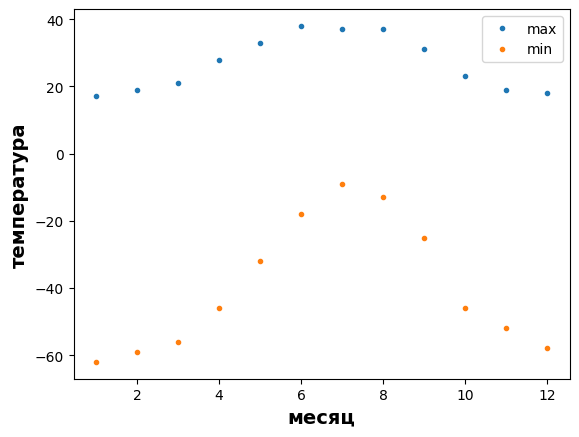

In [29]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
totemp = pd.read_csv('temperatures.csv')
file = open('temperatures.csv')
tototemp =  file.readlines()
totemp = {}
for i in tototemp:
    pre = i.split(';')
    if pre[0][0] != 'm':
        pre[0] = pre[0][1:]
    totemp[pre[0][:-1]] = list(map(int, pre[1:]))
x_data = np.linspace(1, 12, num=12)
plt.xlabel("месяц", fontsize=14, fontweight="bold")
plt.ylabel("температура", fontsize=14, fontweight="bold")
plt.plot(x_data, temp['max'], ".", label="max")
plt.plot(x_data, temp['min'], ".", label="min")
plt.legend()
plt.show()

2. Это переодичная функция, так-что рассмотрим тригонометрическую функцию, к примеру cos(). Так как графики не вокруг нуля, они должны быть сдвинуты на C; cos() так-же надо домножить на амплитуду(A), так-как отличие нижних и верхних точек не 2; период должен быть 12 месяцев, и пик сдвинут => cos(2*pi/12 * (t - B)), где t - передаваемый месяц, B - сдвиг пика. 
В итоге функция должна иметь вид: f(t) = A*cos(2*pi/12 * (t - B)) + C

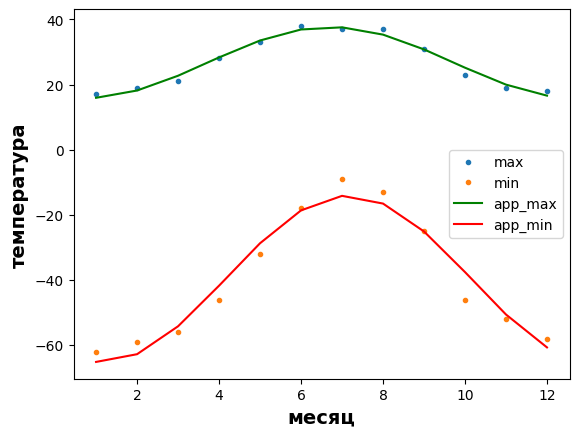

смещения: 7.1560364840094355 6.723480045673084


In [45]:
def approximation(t, A, B, C):
    return abs(A) * np.cos(2*math.pi/12 * (t - B)) + C

(Amax, Bmax, Cmax), _ = sp.optimize.curve_fit(approximation, x_data, temp['max'])
(Amin, Bmin, Cmin), _ = sp.optimize.curve_fit(approximation, x_data, temp['min'])

x_data = np.linspace(1, 12, num=12)
plt.xlabel("месяц", fontsize=14, fontweight="bold")
plt.ylabel("температура", fontsize=14, fontweight="bold")
plt.plot(x_data, temp['max'], ".", label="max")
plt.plot(x_data, temp['min'], ".", label="min")
plt.plot(x_data, approximation(x_data, Amax, Bmax, Cmax), color="green", label="app_max")
plt.plot(x_data, approximation(x_data, Amin, Bmin, Cmin), color="red", label="app_min")
plt.legend()
plt.show()
print("смещения:", Bmin % 12, Bmax)
     

4. Для максимумов соответствие обоснованно, так как все точки хорошо попадают на прямую.
Для минимумов - нет, так как некоторые точки очень далеко от прямой.
5. Смещениене не является одинаковым:  7.1560364840094355 для минимальных температур, 6.723480045673084 для максимальных


## Задача №2: 2-D минимизация  


$f(x, y) = (4-2.1x^{2} + \frac{x^{4}}{3})x^{2} + xy + (4y^{2} - 4)y^{2}$

f(x, y) имеет несколько локальных минимумов. Найдите глобальный минимум (их больше одного, каждый с одинаковым значением целевой функции) и по крайней мере один другой локальный минимум.
А также построить 2D и 3D графики функции.

*Подсказки:*   
1) Переменные могут быть ограничены $-2 < x < 2$, а также  $-1 < y < 1$  
2) **numpy.meshgrid()** и **matplotlib.pyplot.imshow()** могут помочь с визуализацией.  
3) Попробуйте минимизировать с помощью **scipy.optimize.minimize()** с первоначальным предположением $(x, y) = (0, 0)$.   
Находит ли он глобальный минимум или сходится к локальному минимуму? А как насчет других начальных догадок?  
4) Попробуйте минимизировать с помощью **scipy.optimize.differential_evolution()**.


при $-2 < x < 2$, $-1 < y < 1$ первое и третье слагаемое могут быть меньше 0, иначе они точно больше или равны 0.

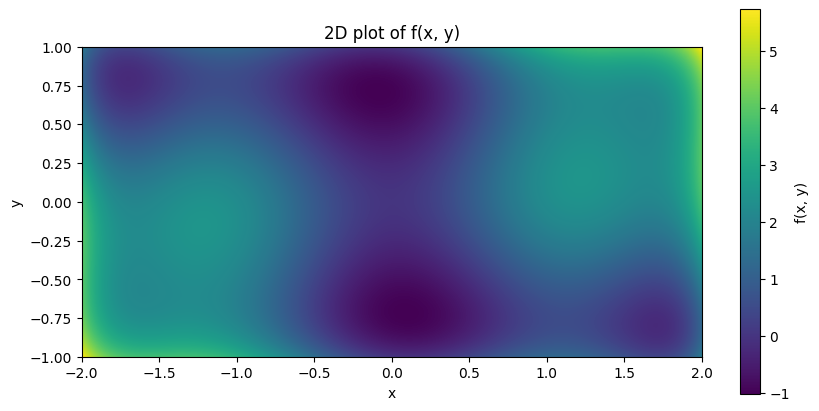

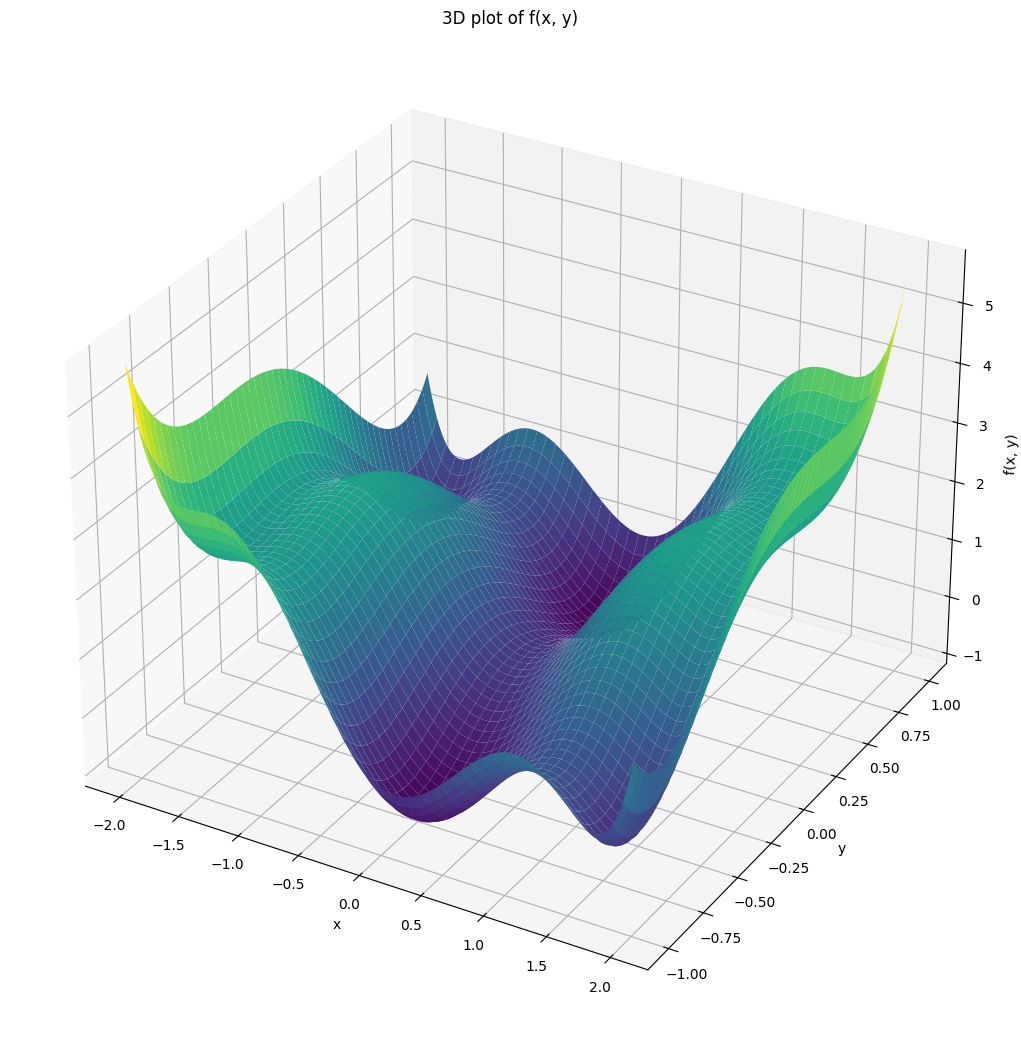

In [218]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
def f(x, y):
    return (4-2.1*x*x + x**4/3)*x*x + x*y +(4*y*y-4)*y*y
def f1(x):
    return (4-2.1*x[0]*x[0] + x[0]**4/3)*x[0]*x[0] + x[0]*x[1] +(4*x[1]*x[1]-4)*x[1]*x[1]

x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 1, 1000)
xv, yv = np.meshgrid(x, y)
zv = f(xv, yv)
plt.figure(figsize=(10, 5))
plt.imshow(zv, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.title('2D plot of f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


fig = plt.figure(figsize=(26, 13))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, zv, cmap='viridis', edgecolor='none')
ax.set_title('3D plot of f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

In [221]:
# минимизация
res = sp.optimize.minimize(f1, x0=[0, 0])
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 5.960e-08 -5.960e-08]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1


первоначальное предположени $(x, y) = (0, 0)$ выдаёт ответ $(x, y) = (0, 0)$ так-как это локальный минимум, z = 0

In [228]:
res = sp.optimize.minimize(f1, x0=[0, 1])
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0316284534897913
        x: [-8.984e-02  7.127e-01]
      nit: 6
      jac: [-1.937e-07 -1.535e-06]
 hess_inv: [[ 1.283e-01 -7.880e-03]
            [-7.880e-03  6.138e-02]]
     nfev: 27
     njev: 9


первоначальное предположени $(x, y) = (0, 1)$ выдаёт ответ $(x, y) = (-0.08984, 0.7127)$, что является глобальным минимумом, z = -1.03162

In [226]:
borders = [(-2, 2), (-1, 1)]

result = sp.optimize.differential_evolution(f1, borders)
print(result)

             message: Optimization terminated successfully.
             success: True
                 fun: -1.0316284534898768
                   x: [-8.984e-02  7.127e-01]
                 nit: 11
                nfev: 378
          population: [[-8.681e-02  7.066e-01]
                       [-8.362e-02  6.309e-01]
                       ...
                       [-9.528e-02  6.929e-01]
                       [-6.848e-02  7.575e-01]]
 population_energies: [-1.032e+00 -9.833e-01 ... -1.028e+00 -1.011e+00]
                 jac: [ 0.000e+00  2.442e-07]


differential_evolution выдаёт ответ $(x, y) = (-0.08984, 0.7127)$, что является глобальным минимумом, z = -1.03162

## Задача №3:  Подотрезок с максимальной суммой   

Реализуйте функцию find_max_sum_segment, выполняющую поиск подотрезка длины **к** с максимальной суммой в целочисленном массиве **аггау**. Функция должна возвращать максимальное значение суммы. Например, у массива **аггаy** = [5, 3, -6, 1] есть 3 подотрезка длины к = 2 с суммами [8, -3, -5] соответственно, в этом случае функция должна вернуть число 8.

В реализации разрешается создавать объекты размерности два. Запрещается использовать циклы, а также готовую функцию пр.cumsum.

*Подсказка*: Задачу можно решать разными способами. Можно обратить внимание на функции для генерации треугольных матриц в пакете numpy и воспользоваться векторно-арифметическими операциями. Можно попробовать сделать специальную бинарную матрицу и также воспользоваться векторно-арифметическими операциями, включая матричные операции.

In [244]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import typing as tp

def find_max_sum_segment (array: tp.List[int], k: int):
    a = np.append(array, np.array([min(array)-1] * (((k - (len(array)%k)) % k) + 1)))
    a = a.reshape(1, len(a))
    a = np.repeat(a, k, 0)
    a = a.reshape(len(a[0]), k)
    a = a.sum(axis=1)
    return max(a)

In [149]:
k = 2
a = np.array([5, 3, -6, 1])
print(find_max_sum_segment(a, k))

8


## Задача № 4: Ближайшие соседи

Допустим, вам необходимо разработать автоматический классификатор, который умеет различать котиков от песиков. Как его реализовать? Можно посмотреть на характеристики каждого животного: вес, длина хвостика, объем туловища, а можно посмотреть и на фотографию. Тем самым для животного получится некоторый вектор $x \in \mathbb{R}^{d}$. Давайте сравним этот вектор с другими векторами котиков и песиков, которых мы видели ранее. Если вектор окажется ближе к котикам, то мы скажем, что перед нами котик, иначе песик.

Обычно среди всего множества известных нам котиков и песиков берут $k$ штук, для которых соответствующие им векторы лежат ближе всего к нашему вектору $x$. Эти $k$ штук векторов называются ближайшими соседями. Можете подумать, почему часто плохо брать $k = 1$.

К самой классификации мы перейдем позже, а сейчас давайте закрепим навык поиска ближайших соседей. Реализуйте функцию **find_nearest_points**, выполняющую поиск $k$ ближайших соседей точек из множества $B$ среди точек из множества $A$. На вход функции подаётся  
*  матрица $A$ размерности $n \times d$,

*  матрица в размерности $m \times d$,

*  число $k$ - количество соседей.

В матрице $A$ по строкам записаны $n$ точек из пространства $\mathbb{R}^{d}$,
аналогично описаны $m$ точек в матрице $B$. Функция **find_nearest_points** должна возвращать матрицу $C$ размерности $m \times k$, каждая строка $j $ $(1≤ j ≤ m)$ которой состоит из $k$ индексов $р_{ji}$ $(1 ≤ p_{ji} ≤ n, 1 ≤ i ≤ k)$ ближайших точек из $A$ к точке $B_{j}$, (по евклидовой метрике).

Шаблон решения:



In [245]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

def find_nearest_points (a: np.ndarray, b: np.ndarray, k: int):
    c = np.array([]).astype('int64')
    for i in range(len(b)):
        dist = a - b[i]
        dist *= dist
        dist = dist.sum(axis = 1)
        dist_list = []
        for j in range(len(dist)):
            dist_list.append((dist[j], j+1))
        dist_list.sort()
        x = []
        for j in range(k):
            x.append(int(dist_list[j][1]))
        c = np.append(c, np.array(x))
    c = c.reshape(len(b), k) 
    return c


Рассмотрим следующий пример:

In [183]:
a = np.array([ [0, 0],
                   [1, 0],
                   [2, 0]])

b = np.array([ [0, 1],
                   [2, 1]])
print(find_nearest_points(a, b, 2))

[[1 2]
 [3 2]]


Для точки (0,1) ближайшей из списка точек л является точка

(0,0), которая имеет индекс 1 (в данной задаче индексация

точек начинается с 1). Второй по расстоянию будет точка

(1,0) с индексом 2, поэтому первая строчка матрицы, которая получена в результате работы функции, равна 1,4

## Задача №5: Матричное перемножение  

Напишите функцию, реализующую матричное умножение. Для этого реализуйте функцию **matrix_multiplication.**

При вычислении разрешается создавать объекты размерности три и **использовать только**:

* простые стандартными поэлементными векторно-арифметическими операциями над numpy.array (поэлементная сумма, поэлементное произведение и т.д.)

* стандартные агрегирующие арифметические операции над numpy.array (например, сумма вдоль оси)

* любые операциями изменения формы массива (например, транспонирование, добавление осей).

**Запрещается пользоваться:**

* циклами

* функциями, реализующими матричное умножение, например, пumpy.dot, операция @, операция умножения в классе numpy.matrix, суммы Эйнштейна и прочие.

* функциями вида map, apply

* функциями вида fromfunction, apply_along_axis  

Использовать библиотеки, которых нет в шаблоне, запрещается.  
Шаблон решения:

In [247]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

def matrix_multiplication(A: np.ndarray, B: np.ndarray):
    B = np.transpose(B)
    A = A.reshape(len(A), 1, len(A))
    C = A*B
    C = C.sum(axis=2)
    return C

In [89]:
A = np.array([[7, 5, 8], [3, 4, 6], [1, 1, 1]])

B = np.array([[4,8, 5], [9, 2, 8], [1, 2, 3]])
print(matrix_multiplication(A, B))

[[81 82 99]
 [54 44 65]
 [14 12 16]]


## Задача №6: Упражнение по обработке изображений - нерасплавленные зерна в стекле

1) Откройте файл изображения MV_HFV_012.jpg и отобразите его. Просмотрите ключевые аргументы в строке документации imshow, чтобы отобразить изображение с «правильной» ориентацией (начало координат в нижнем левом углу, а не в верхнем левом углу, как для стандартных массивов).

2) Это изображение сканирующей элементной микроскопии показывает образец стекла (светло-серая матрица) с несколькими пузырьками (на черном) и нерасплавленными песчинками (темно-серыми). Мы хотим определить долю образца, покрытую этими тремя фазами, и оценить типичный размер песчинок и пузырьков, их размеры и т. д.

3) Обрежьте изображение, чтобы удалить нижнюю панель с информацией об измерениях.

4) Слегка отфильтруйте изображение с помощью медианного фильтра, чтобы уточнить его гистограмму. Проверьте, как изменится гистограмма.

5) Используя гистограмму отфильтрованного изображения, определите пороговые значения, которые позволяют определять маски для пикселей песка, пикселей стекла и пикселей пузырьков.

6) Покажите изображение, на котором три фазы окрашены тремя разными цветами.

7) Используйте математическую морфологию для очистки различных фаз.

8) Присвойте метки всем пузырькам и песчинкам и удалите из маски песка песчинки, которые меньше 10 пикселей. Для этого используйте ndimage.sum или np.bincount для вычисления размеров песчинок.

9) Вычислите средний размер пузырьков.

In [265]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from skimage import filters
from skimage import segmentation

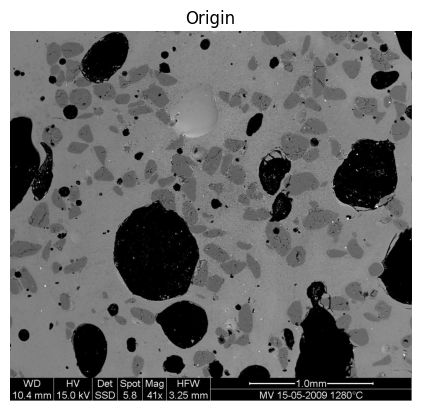

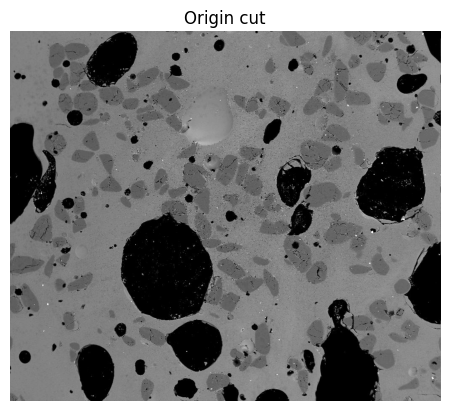

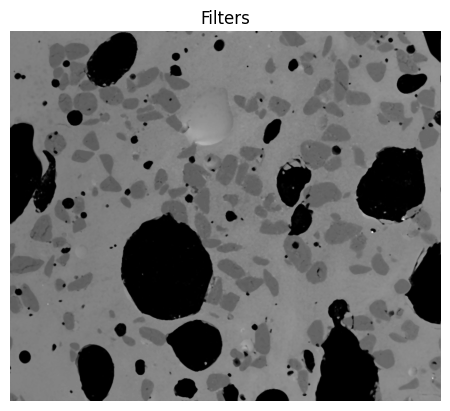

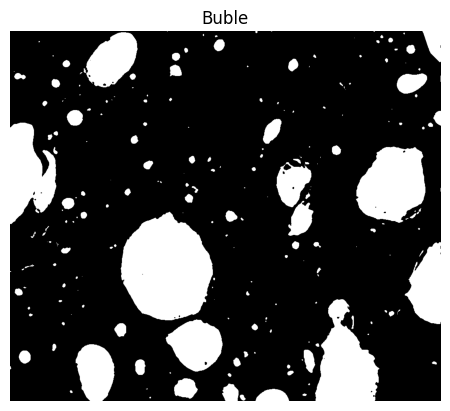

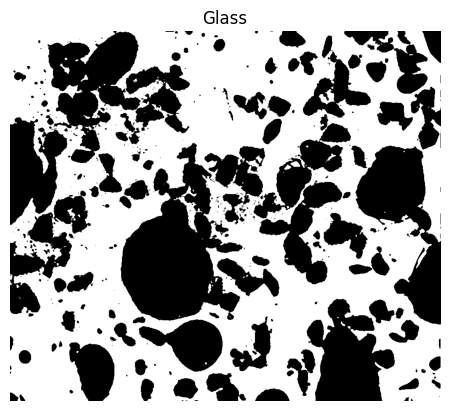

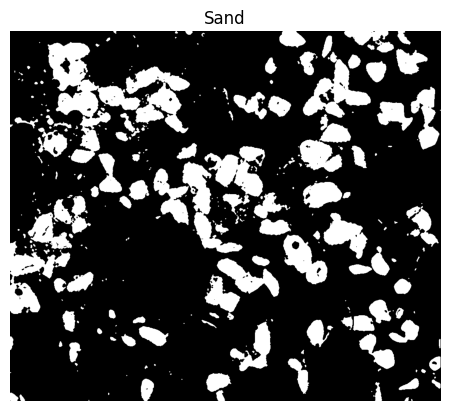

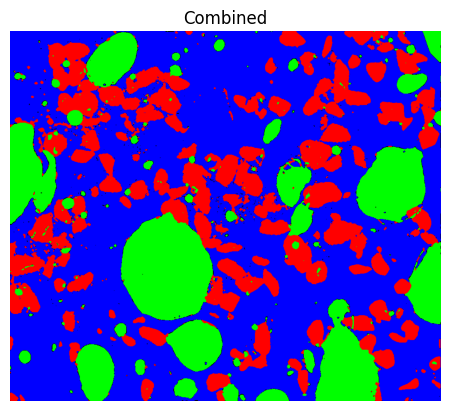

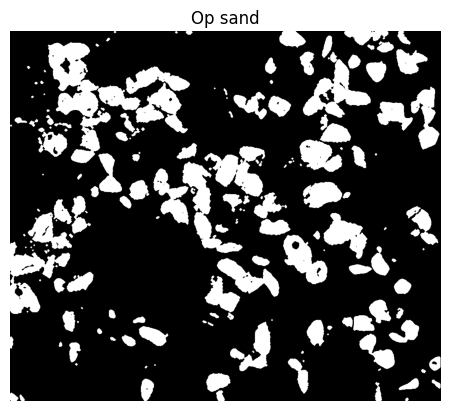

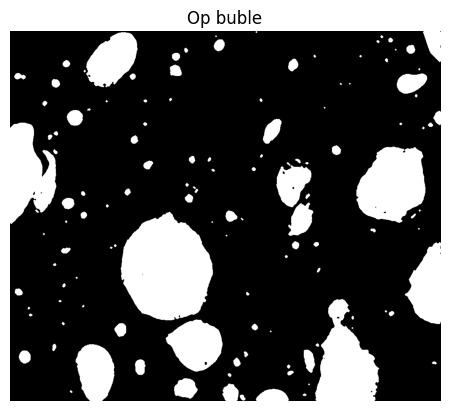

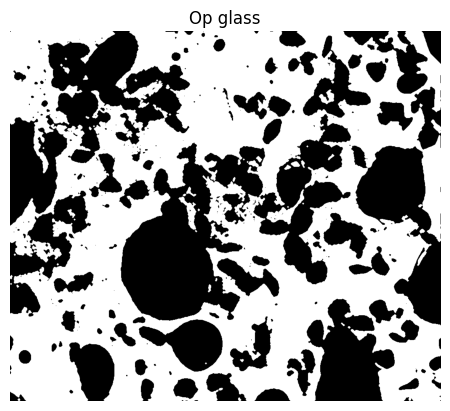

In [310]:
# 1
dat = plt.imread('MV_HFV_012.jpg')
plt.axis('off')
plt.title('Origin')
plt.imshow(dat, cmap="gray")
plt.show()
#  3
plt.axis('off')
plt.title('Origin cut')
dat = dat[:880]
plt.imshow(dat, cmap="gray")
plt.show()
# 4
plt.axis('off')
plt.title('Filters')
dat = filters.median(dat, np.ones((5, 5)))
plt.imshow(dat, cmap="gray")
plt.show()
# 5
plt.axis('off')
plt.title('Buble')
buble_mask = dat < 80
# buble = segmentation.clear_border(buble_mask)
plt.imshow(buble_mask, cmap='gray')
plt.show()
plt.axis('off')
plt.title('Glass')
glass_mask = dat > 120
# glass = segmentation.clear_border(glass_mask)
plt.imshow(glass_mask, cmap='gray')
plt.show()
plt.axis('off')
plt.title('Sand')
pre_sand_mask =  (dat <= 120) * dat
sand_mask = pre_sand_mask >= 80
sand = sp.ndimage.binary_opening(sand_mask)
plt.imshow(sand, cmap='gray')
plt.show()
# 6
plt.axis('off')
plt.title('Combined')
combined_img = np.zeros((len(send), len(send[0]), 3))
combined_img[..., 0] = send
combined_img[..., 1] = buble_mask
combined_img[..., 2] = glass_mask
plt.imshow(combined_img)
plt.show()
# 7
plt.axis('off')
plt.title('Op sand')
sand_op = sp.ndimage.binary_opening(sand, iterations=2)
plt.imshow(sand_op, cmap='gray')
plt.show()
plt.axis('off')
plt.title('Op buble')
buble_op = sp.ndimage.binary_opening(buble_mask, iterations=2)
plt.imshow(buble_op, cmap='gray')
plt.show()
plt.axis('off')
plt.title('Op glass')
glass_op = sp.ndimage.binary_opening(glass_mask, iterations=2)
plt.imshow(glass_op, cmap='gray')
plt.show()
# 8

Подсказка к пункту 7:

In [231]:
sand_op = sp.ndimage.binary_opening(sand, iterations=2)

NameError: name 'sand' is not defined